In [1]:
from optimizer import Optimizer
from heuristics import * 
import random 
import numpy as np 

In [2]:
random.seed(42)
np.random.seed(42)

In [3]:
num_parts = 10
group_length = 2
max_time_machine_A = 24000 + ((num_parts - 10) * 4000)
max_time_machine_B = 22000

demand = {p: 50 for p in range(1, num_parts + 1)}
demand[num_parts + 1] = 0
demand[num_parts + 2] = 0

color_cost = {
    'Red': 10, 'Blue': 10, 'Green': 10, 'Yellow': 10,
    'Black': 10, 'Pink': 10, 'Purple': 10,
}

parts_colors = {i: random.choice(list(color_cost.keys())) for i in range(1, num_parts + 1)}

alpha = [[abs(1 - (parts_colors[p] == parts_colors[q])) for q in range(1, num_parts + 1)] for p in range(1, num_parts + 1)]
unit_production_time = 80
cleaning_time = 80

machines = [1,2]

In [4]:
tabu = TabuSearchScheduler(10,100,num_parts, group_length, max_time_machine_A, max_time_machine_B,
                 demand, color_cost, parts_colors, alpha, unit_production_time, 
                 cleaning_time, machines)

best_solution, best_value, elapsed_time = tabu()
best_value, elapsed_time
best_solution
print(round(elapsed_time, 4))
print(best_value)

0.0064
5


In [5]:
best_solution

{1: [(1, 0, 4000),
  (9, 4000, 8000),
  (3, 8080, 12080),
  (5, 12160, 16160),
  (7, 16240, 20240)],
 2: [(4, 0, 4000),
  (2, 4080, 8080),
  (10, 8080, 12080),
  (6, 12160, 16160),
  (8, 16160, 20160)]}

In [6]:
proposed_optimizer = Optimizer(num_parts, group_length, max_time_machine_A, max_time_machine_B, demand, parts_colors, alpha, unit_production_time, cleaning_time)
proposed_model, optimization_time = proposed_optimizer(best_solution)

Set parameter Username
Set parameter LicenseID to value 2581974
Academic license - for non-commercial use only - expires 2025-11-11
Set parameter IntFeasTol to value 1e-09
Set parameter Threads to value 8
Set parameter Seed to value 12345
Set parameter MIPGap to value 0.05
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 24.2.0 24C101)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 608 rows, 312 columns and 4172 nonzeros
Model fingerprint: 0x08d58aa6
Variable types: 24 continuous, 288 integer (288 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+04]

Loaded user MIP start with objective 5

Presolve removed 206 rows and 92 columns
Presolve time: 0.01s
Presolved: 402 rows, 220 columns, 4580 nonzeros
Variable types: 20 continuous, 200 integer (200 binary)

Root relaxation: objective 

In [7]:
print(optimization_time)

0.24082422256469727


In [8]:
benchmark_optimizer = Optimizer(num_parts, group_length, max_time_machine_A, max_time_machine_B, demand, parts_colors, alpha, unit_production_time, cleaning_time)
benchmark_model, optimization_time = benchmark_optimizer()

Set parameter IntFeasTol to value 1e-09
Set parameter Threads to value 8
Set parameter Seed to value 12345
Set parameter MIPGap to value 0.05
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 24.2.0 24C101)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 608 rows, 312 columns and 4172 nonzeros
Model fingerprint: 0x24fd6564
Variable types: 24 continuous, 288 integer (288 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+04]
Presolve removed 206 rows and 92 columns
Presolve time: 0.01s
Presolved: 402 rows, 220 columns, 4580 nonzeros
Variable types: 20 continuous, 200 integer (200 binary)

Root relaxation: objective 0.000000e+00, 56 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Inc

In [9]:
print(optimization_time)

0.29801130294799805


## Visualization

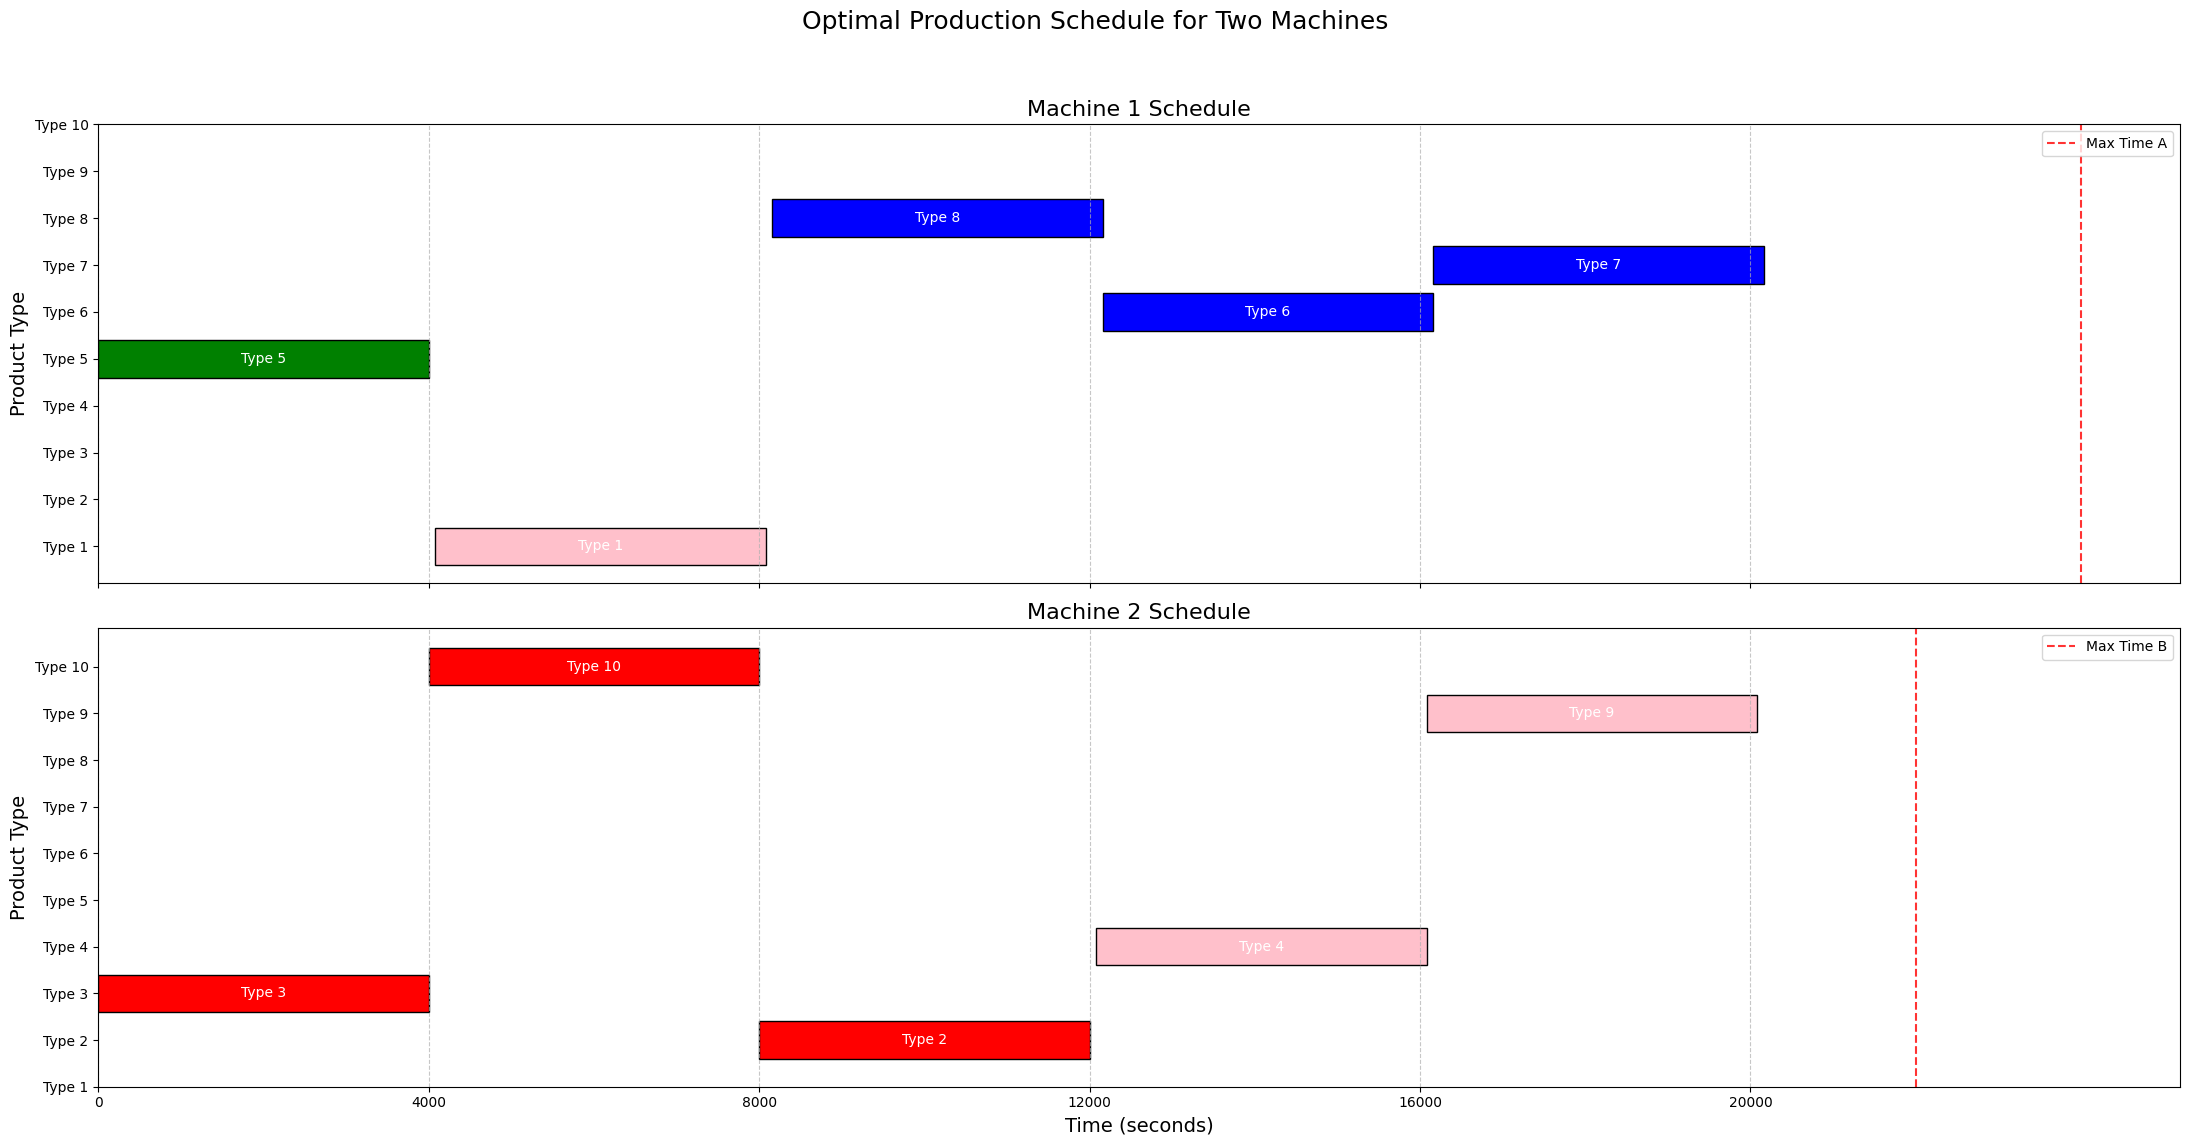

In [10]:
benchmark_optimizer.visualize()

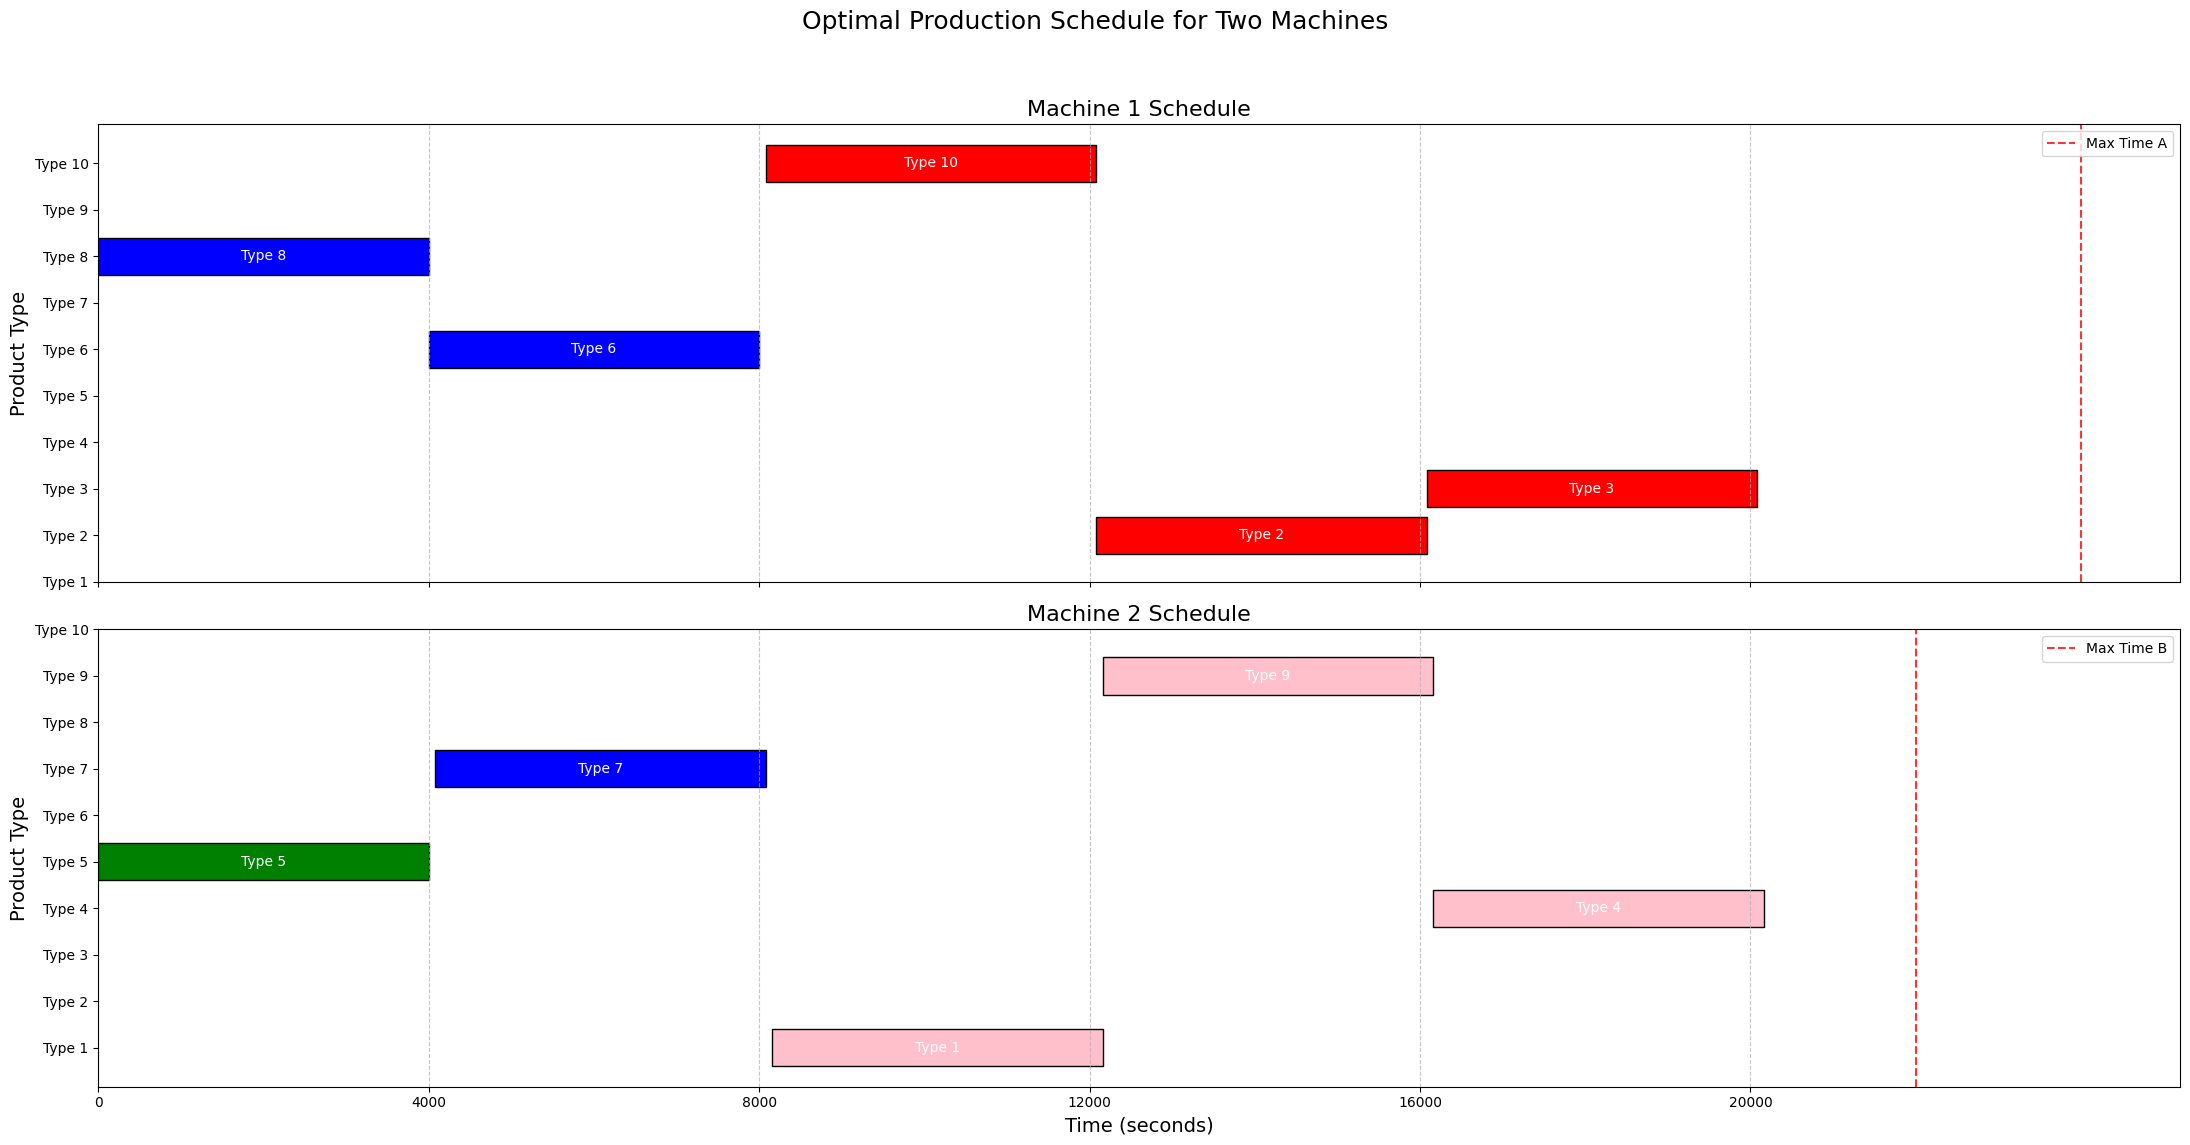

In [11]:
proposed_optimizer.visualize()

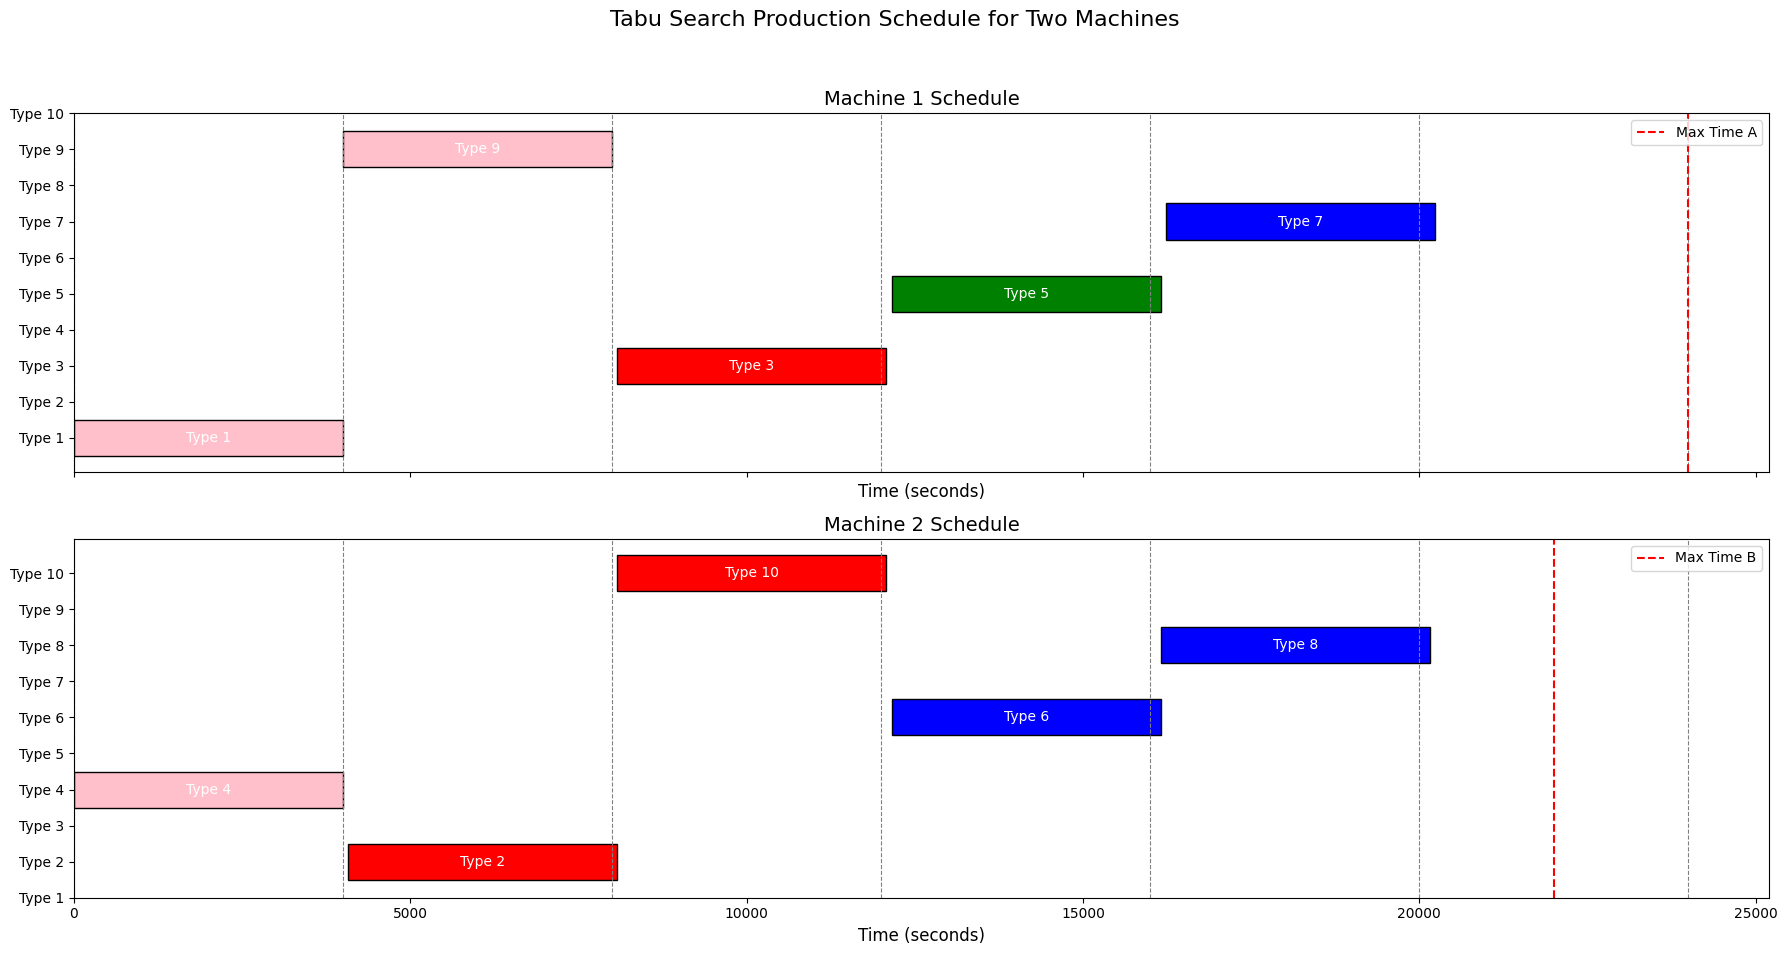

In [12]:
tabu.visualize()